# Herbie Accessors

> 🏗 Some features are under construction

Herbie comes with custom xarray DataSet accessors.

```python
# Usage
ds.herbie.<method>
```

Some of these tools require the [Carpenter Workshop](https://github.com/blaylockbk/Carpenter_Workshop) package.

In [1]:
from herbie import Herbie

In [2]:
H = Herbie("2022-12-05 06:00", fxx=6, model="hrrr")
ds = H.xarray("TMP:2 m")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2022-Dec-05 06:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/home/blaylock/data/hrrr/20221205]


In [3]:
ds

<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2022-12-05T06:00:00
    step                 timedelta64[ns] 06:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2022-12-05T12:00:00
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 294.4 294.4 294.4 ... 273.0 273.0 273.0
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /home/blaylock/data/hrrr/20221205/subset_0cb2fd5...
    searchString:            TMP:2 m

## Cartopy Coordinate Reference System
Derive the Cartopy coordinate reference system.

This is helpful if you want to plot the data on the map.

> Requires Metpy and Pygrib

In [4]:
ds.herbie.crs

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


<Derived Projected CRS: +proj=lcc +ellps=sphere +a=6371229.0 +b=6371229.0  ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

## Model domain boundary
Returns the model domain boundary as a polygon. 
1. Polygon in model coordinate system.
1. Polygon in latitude/longitude coordinates.

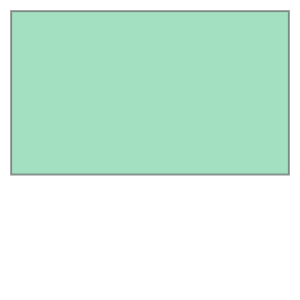

In [5]:
ds.herbie.polygon[0]

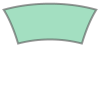

In [6]:
ds.herbie.polygon[1]

## Extract nearest points
Extract the value nearest a latitude/longitude point.

The `points` argument accepts several different inputs.

- a tuple of `(lon, lat)`
- a list  of tuples `[(lon, lat), (lon, lat), (lon, lat)]`
- a Pandas DataFrame with columns `longitude` and `latitude` (Index will be used to name the points).
- a Shapely geometry `Point` or `MultiPoint` object.

In [8]:
# Get value nearest single point
ds.herbie.nearest_points(points=(-100, 40))

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<xarray.Dataset>
Dimensions:              (point: 1)
Coordinates:
    time                 datetime64[ns] 2022-12-05T06:00:00
    step                 timedelta64[ns] 06:00:00
    heightAboveGround    float64 2.0
    latitude             float64 40.01
    longitude            float64 260.0
    valid_time           datetime64[ns] 2022-12-05T12:00:00
    metpy_crs            object Projection: lambert_conformal_conic
    y                    float64 1.707e+05
    x                    float64 -2.135e+05
  * point                (point) object None
    point_latitude       (point) int64 40
    point_longitude      (point) int64 -100
Data variables:
    t2m                  (point) float32 271.0
    gribfile_projection  (point) object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /home/blaylock/data/hrrr/20221205/subset_0cb2fd5...
    searchString:            TMP:2 m

In [9]:
import pandas as pd

# Get values nearest many points

df = pd.DataFrame(
    {
        "longitude": range(-100, -90, 2),
        "latitude": range(35, 45, 2),
    }
)

ds.herbie.nearest_points(points=df)

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<xarray.Dataset>
Dimensions:              (point: 5)
Coordinates:
    time                 datetime64[ns] 2022-12-05T06:00:00
    step                 timedelta64[ns] 06:00:00
    heightAboveGround    float64 2.0
    latitude             (point) float64 34.99 37.01 39.0 41.01 43.01
    longitude            (point) float64 260.0 262.0 264.0 266.0 268.0
    valid_time           datetime64[ns] 2022-12-05T12:00:00
    metpy_crs            object Projection: lambert_conformal_conic
    y                    (point) float64 -3.873e+05 -1.653e+05 ... 5.157e+05
    x                    (point) float64 -2.285e+05 -4.552e+04 ... 4.495e+05
  * point                (point) int64 0 1 2 3 4
    point_latitude       (point) int64 35 37 39 41 43
    point_longitude      (point) int64 -100 -98 -96 -94 -92
Data variables:
    t2m                  (point) float32 282.1 274.5 274.0 272.5 271.2
    gribfile_projection  (point) object None None None None None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /home/blaylock/data/hrrr/20221205/subset_0cb2fd5...
    searchString:            TMP:2 m

## Create a quick map

cfgrib variable: t2m
GRIB_cfName air_temperature
GRIB_cfVarName t2m
GRIB_name 2 metre temperature
GRIB_units K
GRIB_typeOfLevel heightAboveGround



/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<GeoAxesSubplot: title={'left': 'Run: 06:00 UTC 05 Dec 2022 F06', 'center': 'HRRR 2 m\n', 'right': 'Valid: 12:00 UTC 05 Dec 2022'}>

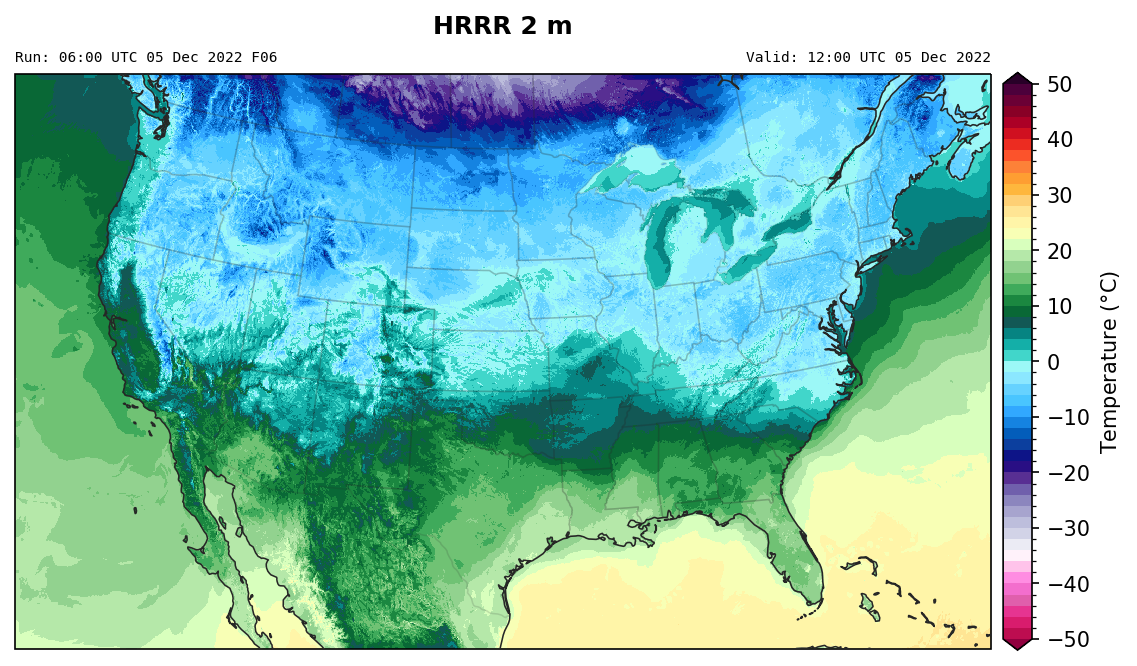

In [10]:
ds.herbie.plot()